# Creating classification graphs

In [251]:
import glob
import json
import joblib
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Validation set accuracy

In [267]:
validation_accuracy = {}
for model_reports in glob.glob('../models/*/reports.json'):
    model_name = model_reports.split('/')[-2]
    accuracy = json.load(open(model_reports, 'r'))['validation_report']['accuracy']
    validation_accuracy[model_name] = accuracy

fig = px.bar(
    x=validation_accuracy.values(),
    y=validation_accuracy.keys(),
    color=validation_accuracy.values(),
    color_continuous_scale='oxy',
    title='Validation set accuracy',
    labels={'x': 'accuracy', 'y': 'Model'}
    )

fig.update_layout(yaxis={'categoryorder': 'total descending'}, font={'size': 24})
fig.update_xaxes(range=[0.5, 0.8])
fig.update_coloraxes(showscale=False)
fig.write_image('../../images/validation-accuracy.png', scale=10)
fig

### Validation precision

In [268]:
validation_f1 = {}
for model_reports in glob.glob('../models/*/reports.json'):
    model_name = model_reports.split('/')[-2]
    f1 = json.load(open(model_reports, 'r'))['validation_report']['macro avg']['f1-score']
    validation_f1[model_name] = f1

fig = px.bar(
    x=validation_f1.values(),
    y=validation_f1.keys(),
    color=validation_f1.values(),
    color_continuous_scale='oxy',
    title='Validation set f1',
    labels={'x': 'f1', 'y': 'Model'}
    )

fig.update_layout(yaxis={'categoryorder': 'total descending'}, font={'size': 24})
fig.update_xaxes(range=[0.5, 0.8])
fig.update_coloraxes(showscale=False)
fig.write_image('../../images/validation-f1.png', scale=10)
fig

### Random forest confustion matrix

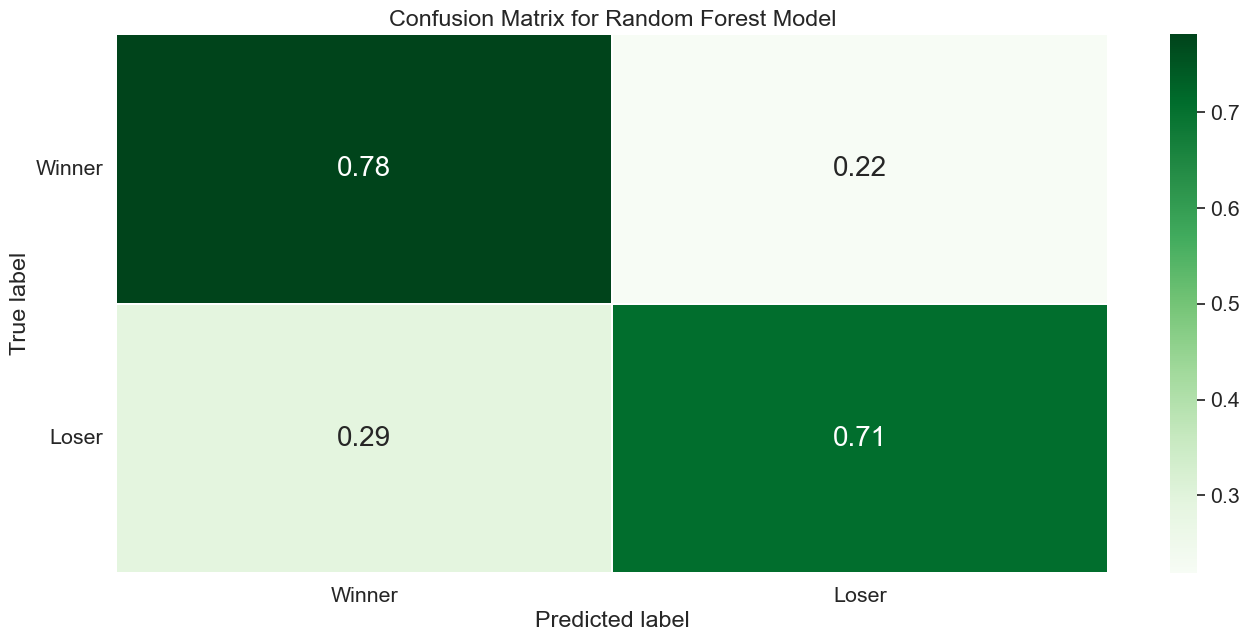

In [269]:
df = pd.read_csv('../../project/bet_table.csv')
df.drop(df[df.Result == 'NON_RUNNER'].index, inplace=True)
X = df.drop(['Result', 'Stakes'], axis=1)
y = df['Result']
label_encoder = LabelEncoder()
X['Race_Type'] = label_encoder.fit_transform(X['Race_Type'])
X['Going'] = label_encoder.fit_transform(X['Going'])
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)  # 80:10:10 train:validation:test split

model = joblib.load('../../project/models/random_forest/model.joblib')
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
matrix = confusion_matrix(y_test, y_test_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Winner', 'Loser']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks2, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()